In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sales = pd.read_csv('/content/drive/MyDrive/My Project/advertising.csv')
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
print(sales.shape)
print(sales.info())
print(sales.describe())
print(sales.dtypes)
print(sales.isnull().sum())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object
TV           0
Rad

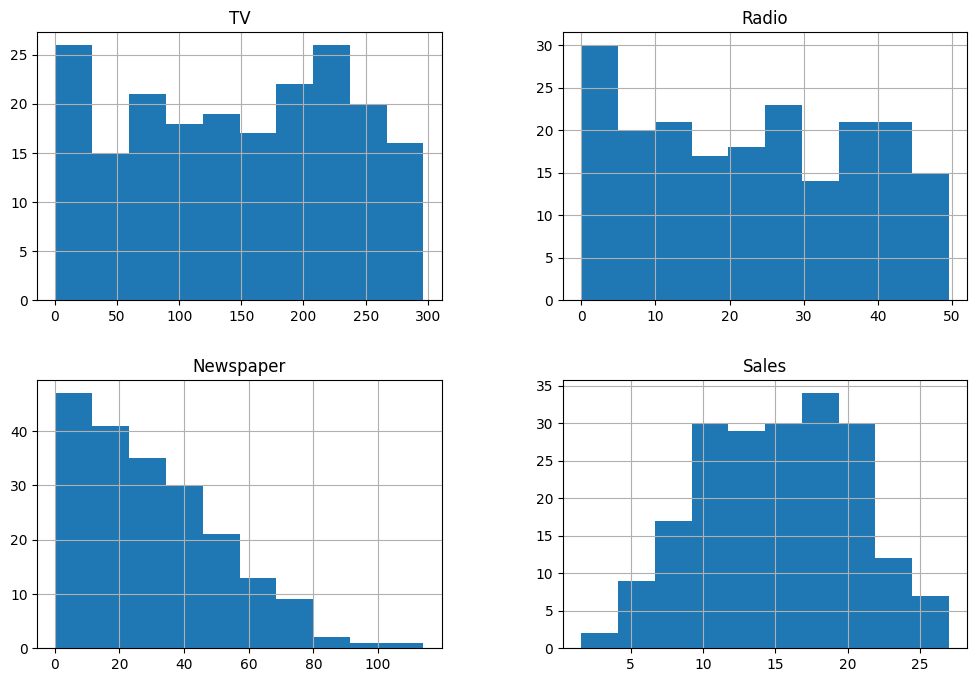

In [ ]:
# Create histograms for each feature
sales.hist(figsize=(12, 8))
plt.show()

<ipython-input-18-fd6b0defb228>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['TV'], ax=axes[0,0])
<ipython-input-18-fd6b0defb228>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['Radio'], ax=axes[0,1])
<ipython-input-18-fd6b0defb228>:5: UserWarning: 

`distplot` is a deprecated 

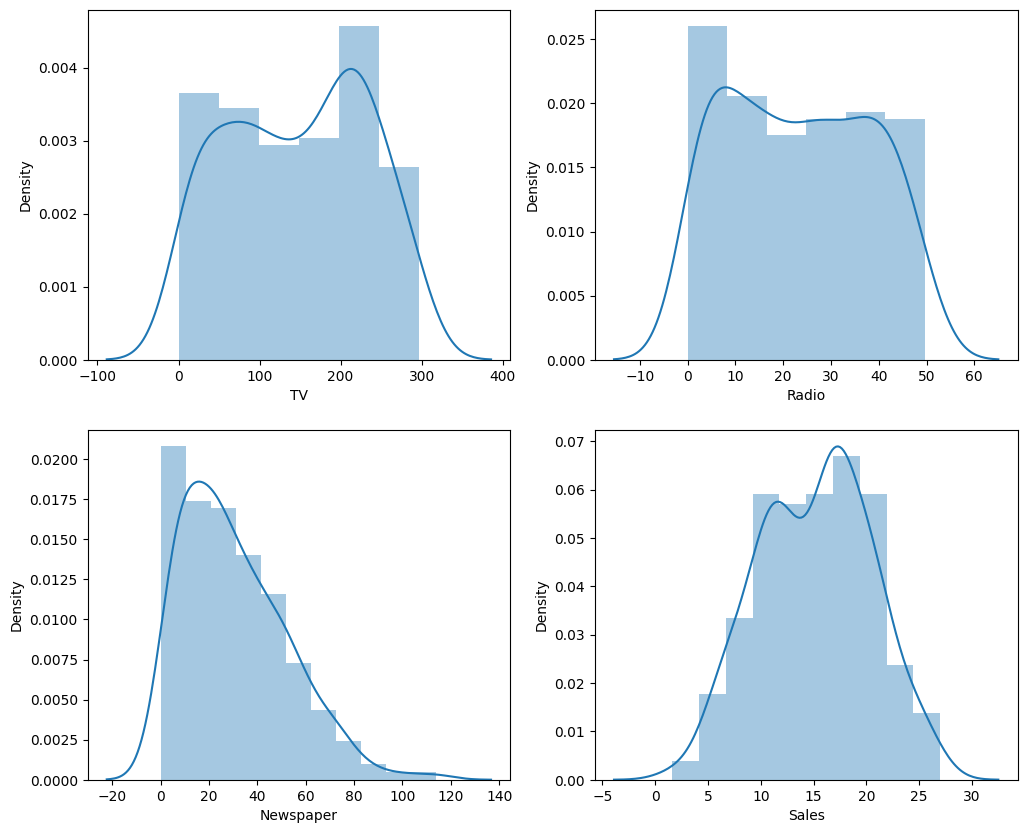

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.distplot(sales['TV'], ax=axes[0,0])
sns.distplot(sales['Radio'], ax=axes[0,1])
sns.distplot(sales['Newspaper'], ax=axes[1,0])
sns.distplot(sales['Sales'], ax=axes[1,1])

plt.show()


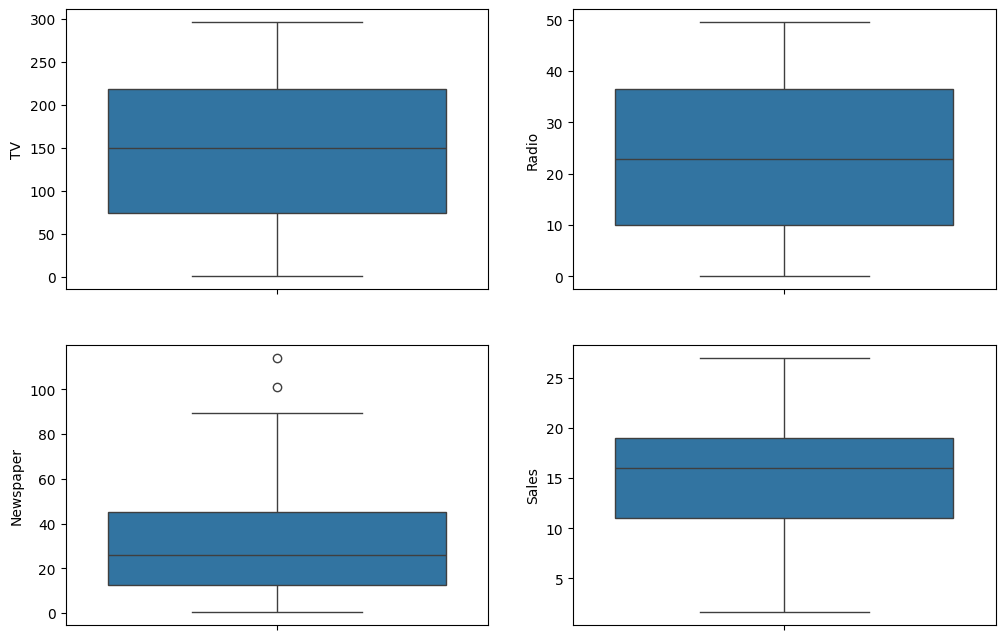

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.boxplot(y=sales['TV'], ax=axes[0,0])
#axes[0].set_title('Applicant_Income')

sns.boxplot(y=sales['Radio'], ax=axes[0,1])
#axes[1].set_title('Co_Applicant_Income')

sns.boxplot(y=sales['Newspaper'], ax=axes[1,0])
#axes[2].set_title('Loan_Amount')

sns.boxplot(y=sales['Sales'], ax=axes[1,1])
#axes[3].set_title('Loan_Amount_Term')

plt.show()

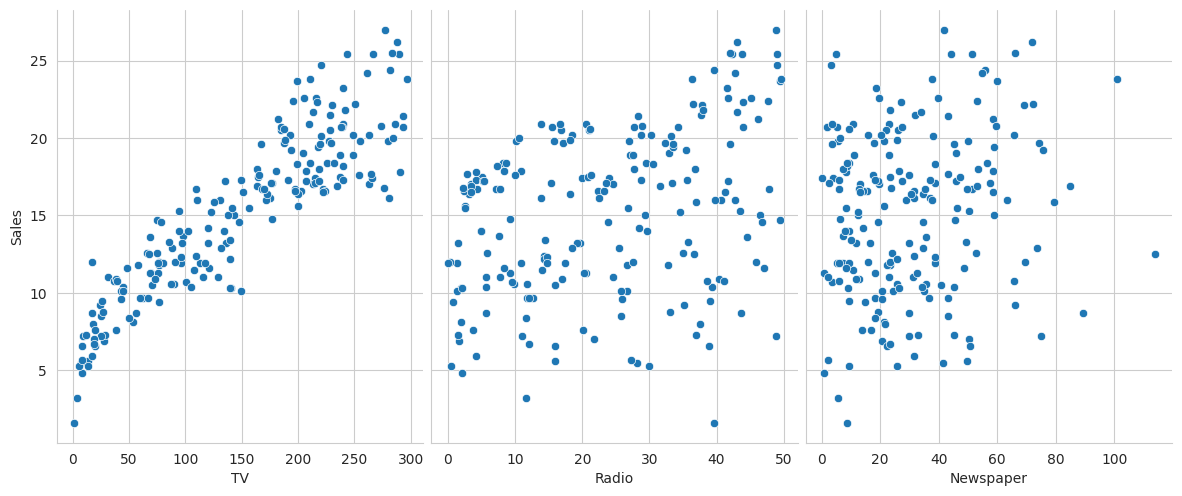

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(sales, x_vars= ['TV', 'Radio', 'Newspaper'], y_vars= 'Sales', height = 5, aspect=0.8)
plt.show()

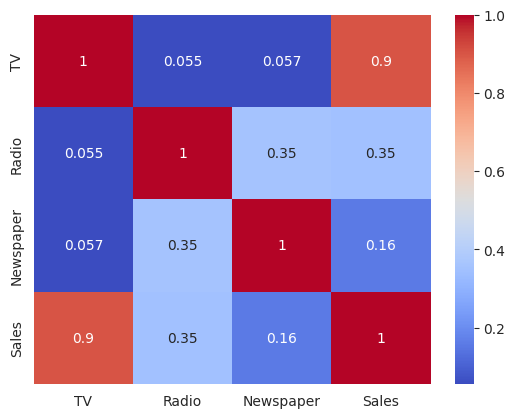

In [ ]:
correlation_matrix = sales.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
x = sales.drop(['Sales'], axis = 1)
y = sales['Sales']

In [ ]:
# Dividing the dependent and independent variable into train and test set (25-75 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_LR = linear_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred_LR)
print("Mean Squared Error of Linear Regression:", mse)

Mean Squared Error of Linear Regression: 4.522552562041291
